In [2]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
a, b = 0.5, 1.5
ua, ub = 0, 3
sources = [
    None,
    [((a + b) / 2, 10)],
    [(a + (b - a) / 4, 10), (a + 3 * (b - a) / 4, 10)],
    [(a + (b - a) / 4, 100), (a + 3 * (b - a) / 4, 10)],
]
f = lambda x: x
n = 150
h = (b - a) / n
vector_x = np.linspace(a, b, n + 1)

In [4]:
def coeff(k, x1, x2):
    f = lambda x: 1 / k(x)
    return (integrate.quad(f, x1, x2)[0]) ** -1


def phi(f, x1, x2):
    return integrate.quad(f, x1, x2)[0]


def delta_integral(x, x0, h, c):
    if abs(x - x0) - h / 2 < 1e-5:
        return c / 2
    elif abs(x - x0) < h / 2:
        return c
    return 0


def solve(a, b, ua, ub, n, f, k, sources = None):
    h = (b - a) / n
    vector_x = np.linspace(a, b, n + 1)

    matrix_u = np.zeros((n + 1, n + 1))
    vector_c = np.zeros(n + 1)
    
    matrix_u[0][0] = matrix_u[n][n] = 1
    vector_c[0], vector_c[n] = ua, ub
    
    for i in range(1, n):
        prev_x, x, next_x = vector_x[i - 1 : i + 2]
        matrix_u[i][i - 1] = coeff(k, prev_x, x)
        matrix_u[i][i] = - coeff(k, prev_x, x) - coeff(k, x, next_x)
        matrix_u[i][i + 1] = coeff(k, x, next_x)
        if sources:
            vector_c[i] = -sum(delta_integral(x, x0, h, c) for x0, c in sources)
        else:
            vector_c[i] = -phi(f, x - h / 2, x + h / 2)

    vector_u = np.linalg.solve(matrix_u, vector_c)
    return vector_u

In [5]:
def get_k_fun(k1, k2, k3=None):
    if k3 is None:
        def f(x):
            if a <= x <= 0.5 * (b + a):
                return k1
            else:
                return k2
    else:
        def f(x):
            if a <= x <= a + (b - a) / 3:
                return k1
            elif a + (b - a) / 3 < x <= a + 2 * (b - a) / 3:
                return k2
            else:
                return k3
    return f

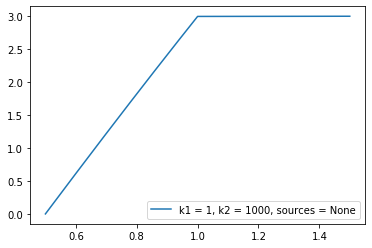

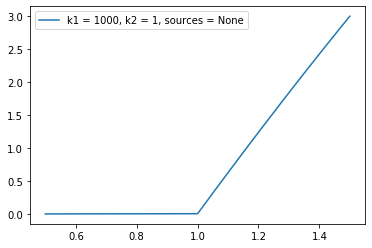

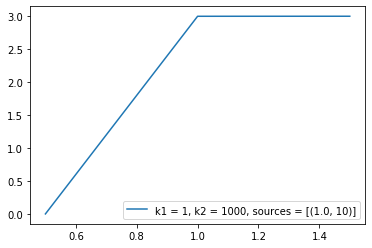

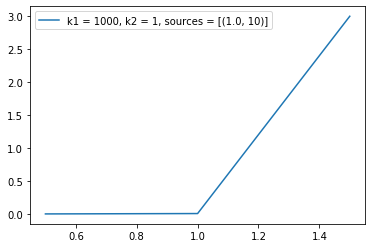

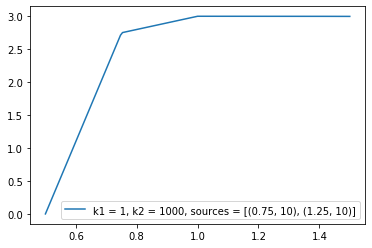

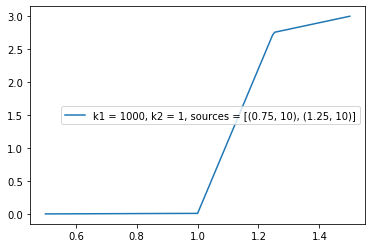

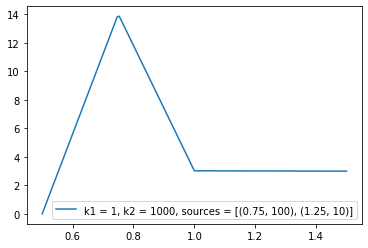

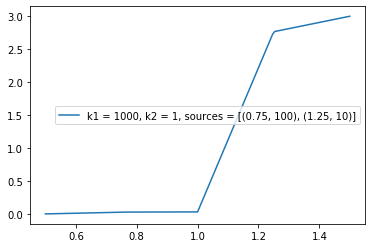

In [6]:
k_values = [
    [1, 1000], 
    [1000, 1],
]

for sour in sources:
    for k1, k2 in k_values:
        k = get_k_fun(k1, k2)
        vector_u = solve(a, b, ua, ub, n, f, k, sour)
        plt.plot(vector_x, vector_u, label='k1 = {}, k2 = {}, sources = {}'.format(k1, k2, sour))
        plt.legend()
        plt.show()

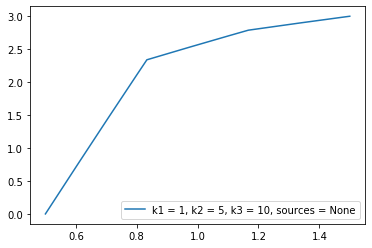

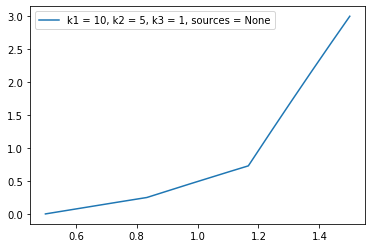

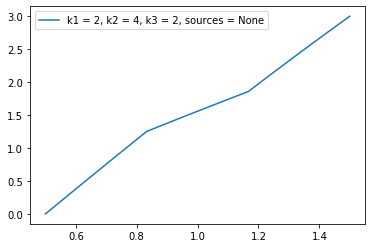

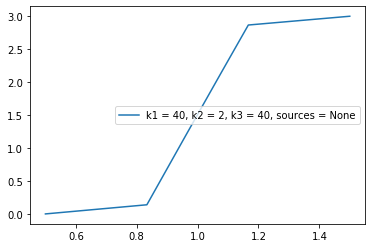

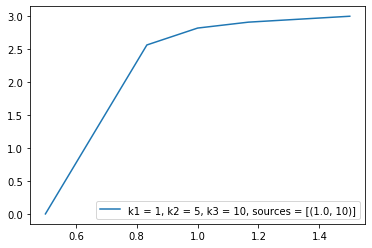

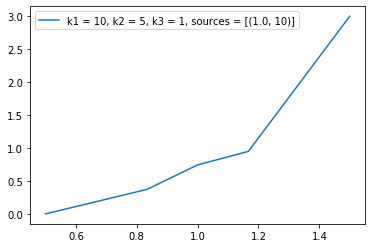

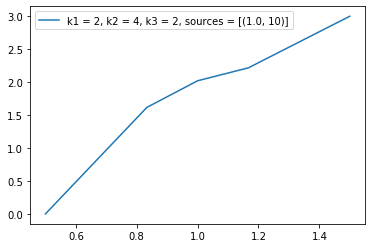

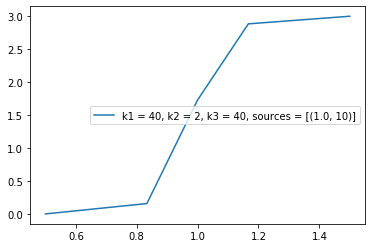

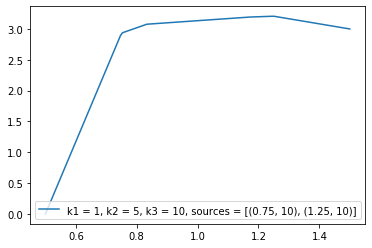

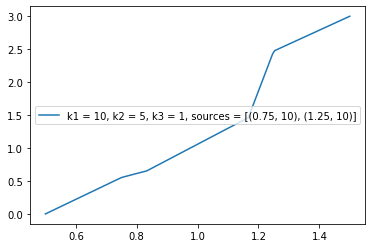

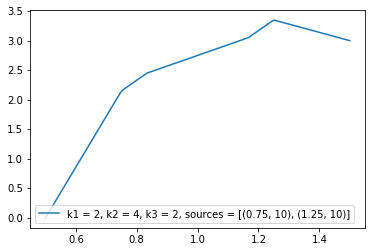

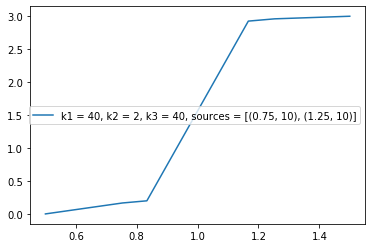

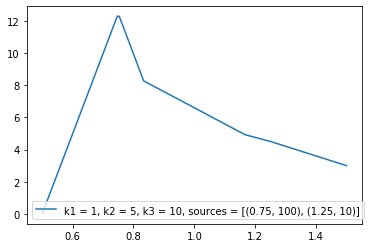

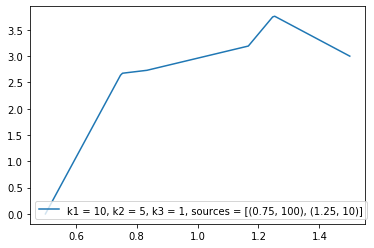

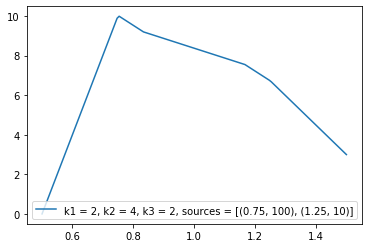

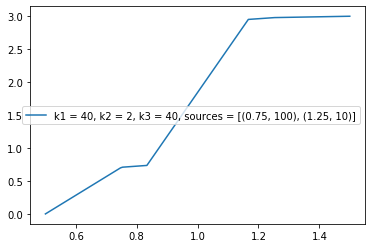

In [7]:
k_values = [
    [1, 5, 10],         
    [10, 5, 1], 
    [2, 4, 2], 
    [40, 2, 40],
]

for sour in sources:
    for k1, k2, k3 in k_values:
        k = get_k_fun(k1, k2, k3)
        vector_u = solve(a, b, ua, ub, n, f, k, sour)
        plt.plot(vector_x, vector_u, label='k1 = {}, k2 = {}, k3 = {}, sources = {}'.format(k1, k2, k3, sour))
        plt.legend()
        plt.show()